<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
   Lab 1
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Phần 2 - Khám phá và phân tích dữ liệu
</div>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

# 3. EDA

Trong phần này, ta sẽ đi sâu hơn về mối quan hệ giữa các biến, tìm ra các thông tin hữu ích.

In [73]:
df = pd.read_csv("data/US_Accidents_processed.csv")
time_cols=['Start_Time','End_Time','Weather_Timestamp']
# for col in time_cols:
#     #df[col]=pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')
#     df[col]=pd.to_datetime(df[col], format='mixed')
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [74]:
from datetime import datetime

date_string = '2020-04-17 09:29:30'
date_format = '%Y-%m-%d %H:%M:%S'

try:
    date_obj = datetime.strptime(date_string, date_format)
    print("Parsed datetime object:", date_obj)
except ValueError as e:
    print("There was an error parsing the date:", e)


Parsed datetime object: 2020-04-17 09:29:30


## 3.1 Khám phá mỗi quan hệ giữa các biến

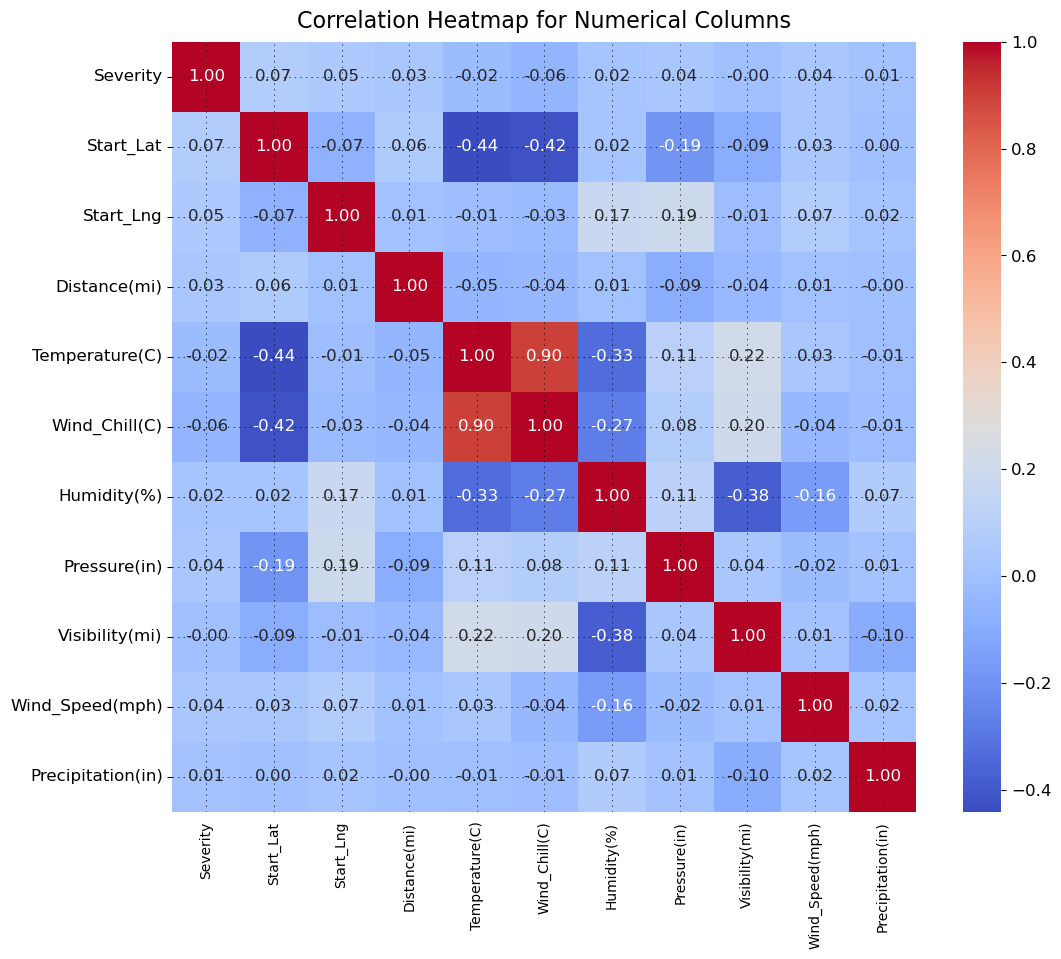

In [75]:
# variable_pairs = [(x, y) for i, x in enumerate(numerical_cols) for j, y in enumerate(numerical_cols) if i < j]

numerical_df = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
correlation_matrix = numerical_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

**Comment**

Hexbin Plot thể hiện mỗi quan hệ giữa **Nhiệt độ** và **Độ ẩm** với điều kiện thời tiết là **Mostly Cloudy**

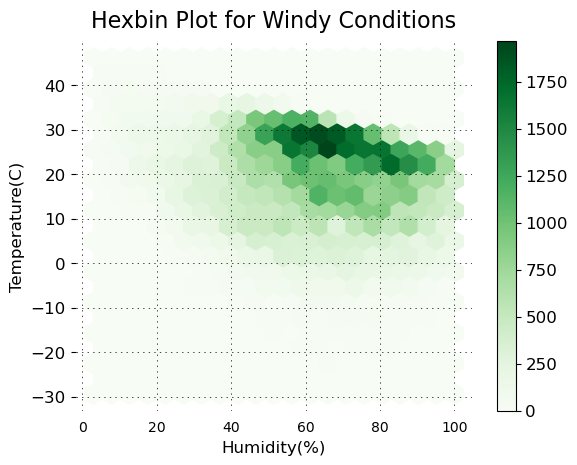

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo hexbin plot cho các điều kiện thời tiết chứa từ khóa 'Windy'
windy_conditions = df[df['Weather_Condition'].str.contains('Mostly Cloudy', case=False)]
windy_conditions.shape
# Vẽ hexbin plot bằng Pandas

windy_conditions.plot.hexbin(x="Humidity(%)", y="Temperature(C)", gridsize=20, cmap='Greens')
plt.xlabel("Humidity(%)")
plt.ylabel("Temperature(C)")
plt.title("Hexbin Plot for Windy Conditions")
plt.show()

### Biểu đồ cột thể hiện chiều dài trung bình đoạn đường bị ảnh hưởng theo mức độ nghiêm trọng của vụ tai nạn

- **Lợi ích**: 
    - Giúp người đọc hình dung được độ ảnh hưởng của vụ tai nạn theo mức độ nghiêm trọng của nó
- **Lựa chọn biểu đồ**:
    - Lựa chọn biểu đồ cột để dễ dàng so sánh độ ảnh hưởng của vụ tai nạn giữa các mức độ nghiêm trọng tương ứng

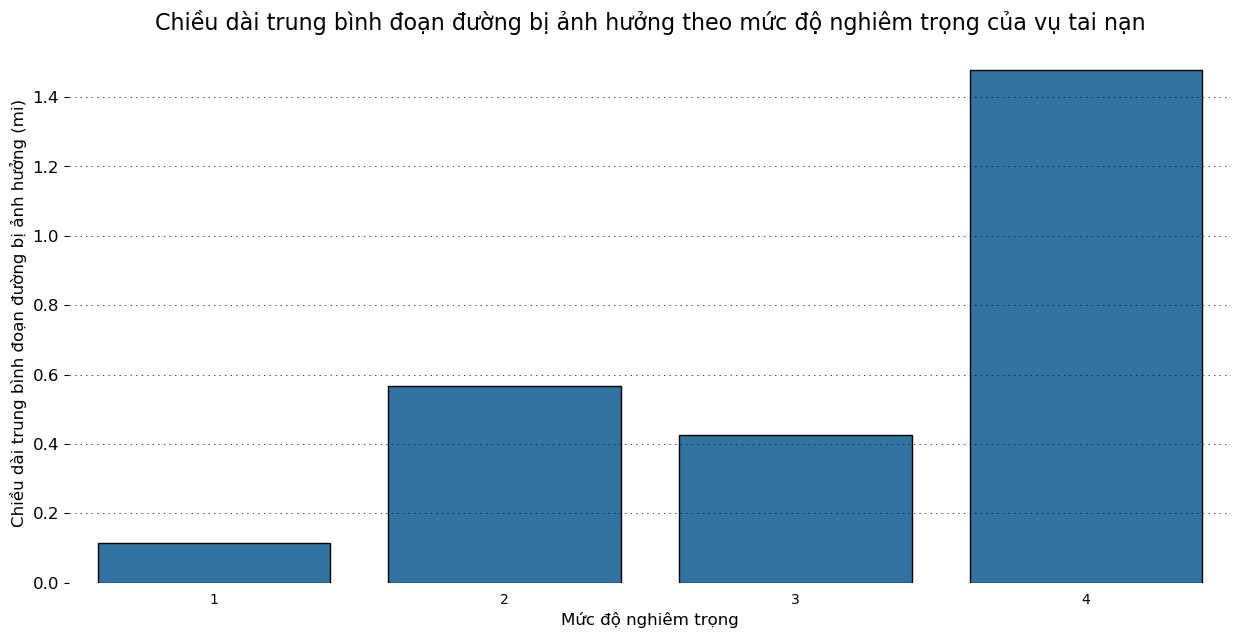

In [77]:

# Vẽ biểu đồ cột
plt.figure(figsize= (15, 7))
sns.barplot(x='Severity', y='Distance(mi)', data=df, errorbar=("ci", False))

plt.title('Chiều dài trung bình đoạn đường bị ảnh hưởng theo mức độ nghiêm trọng của vụ tai nạn')
plt.xlabel('Mức độ nghiêm trọng')
plt.ylabel('Chiều dài trung bình đoạn đường bị ảnh hưởng (mi)')
plt.show()

**Nhận xét**: 
- Độ ảnh hưởng tăng vọt từ mức độ 1 -> 2 và từ mức độ 3 -> 4. 
- Có thể cho rằng mức độ nghiêm trọng càng lớn thì ảnh hưởng đến giao thông càng nhiều.

### Biểu đồ Scatter biểu diễn mối quan hệ giữa Nhiệt độ và Độ gió lạnh

- **Lợi ích**:
    - Giúp người đọc thấy được mối tương quan giữa Nhiệt độ và Độ gió lạnh
- **Lựa chọn biểu đồ**:
    - Vì để thể hiện mối tương quan giữa 2 biến liên tục nên sẽ lựa chọn biểu đồ scatter

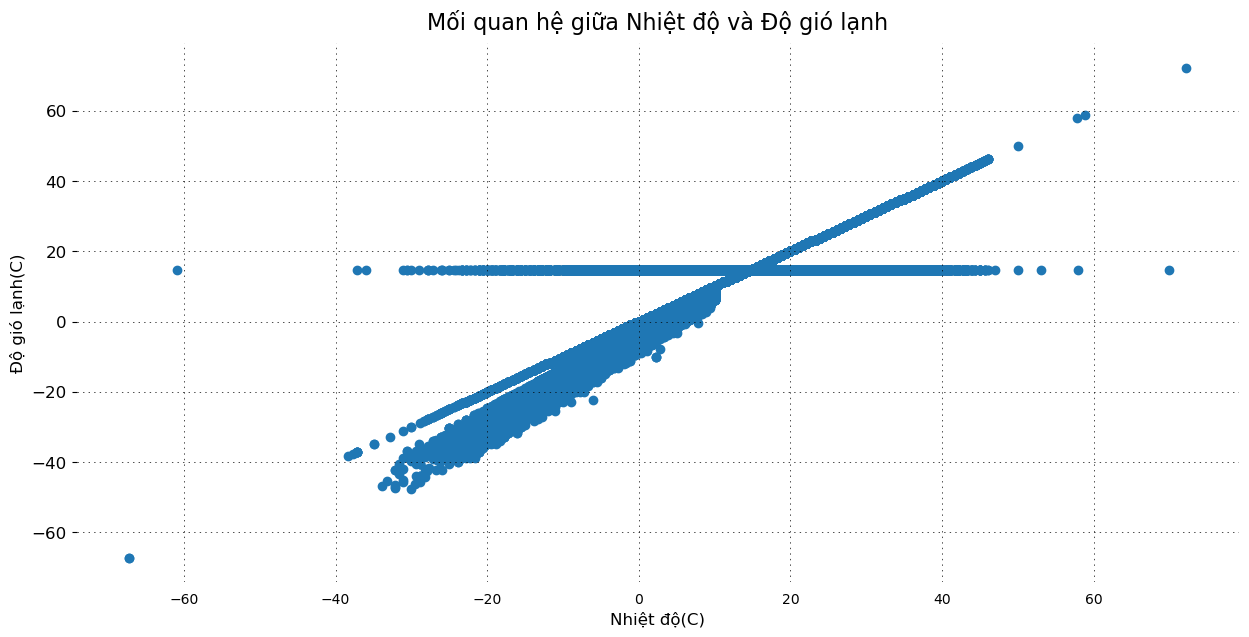

In [78]:

plt.figure(figsize = (15, 7))
plt.scatter(df["Temperature(C)"], df["Wind_Chill(C)"])
plt.title("Mối quan hệ giữa Nhiệt độ và Độ gió lạnh")
plt.xlabel("Nhiệt độ(C)")
plt.ylabel("Độ gió lạnh(C)")
plt.show()

**Nhận xét**:
- Có thể thấy khi Nhiệt độ càng tăng thì Độ gió lạnh cũng có xu hướng tăng theo.
- Tồn tại một Độ gió lạnh mà ở đó Nhiệt độ không ảnh hưởng đến nó.

## 3.2 Các câu hỏi khám phá dữ liệu

### 3.2.1 Tổng quan tình hình tai nạn qua các năm
- **Lợi ích:**
    - Giúp người đọc có cái nhìn chung về tình hình tai nạn giao thông qua các năm
- **Lựa chọn biểu đồ:**
    - Do mục đích chính của phần này là để có cái nhìn chung về số ca tai nạn theo từng năm, nên ta có thể sử dụng biểu đồ đường hoặc biểu đồ miền. Bên cạnh đó, do em muốn nhìn thấy sự thay đổi của các phân loại tai nạn (theo mức độ nghiêm trọng, theo thời gian,..) nên em sẽ sử dụng biểu đồ miền

In [79]:
import plotly.express as px
import pandas as pd

# Tạo bản sao của df
df_copy = df.copy()

# Tạo cột Year từ Start_Time
df_copy['Year'] = df_copy['Start_Time'].dt.year

# Tính tổng số vụ tai nạn theo năm và mức độ nghiêm trọng
df_grouped = df_copy.groupby(['Year', 'Severity']).size().reset_index(name='Count')

# Vẽ biểu đồ miền
fig = px.area(df_grouped, x="Year", y="Count", color="Severity",
              title='Tổng số vụ tai nạn qua các năm theo mức độ nghiêm trọng',
              labels={'Count':'Tổng số vụ tai nạn', 'Year':'Năm', 'Severity':'Mức độ nghiêm trọng'})

fig.show()

In [80]:
# Group data by Year and Timezone
df_grouped_timezone = df_copy.groupby(['Year', 'Timezone']).size().reset_index(name='Count')

# Plot area chart for Timezone
fig_timezone = px.area(df_grouped_timezone, x="Year", y="Count", color="Timezone",
                       title='Tổng số vụ tai nạn qua các năm theo vị trí',
                       labels={'Count':'Tổng số vụ tai nạn', 'Year':'Năm', 'Timezone':'Vị trí'})
fig_timezone.show()


In [81]:
# Group data by Year and Sunrise_Sunset
df_grouped_sunrise_sunset = df_copy.groupby(['Year', 'Sunrise_Sunset']).size().reset_index(name='Count')

# Plot area chart for Sunrise_Sunset
fig_sunrise_sunset = px.area(df_grouped_sunrise_sunset, x="Year", y="Count", color="Sunrise_Sunset",
                             title='Tổng số vụ tai nạn qua các năm theo buổi',
                             labels={'Count':'Tổng số vụ tai nạn', 'Year':'Năm', 'Sunrise_Sunset':'Buổi'})
fig_sunrise_sunset.show()


Nhận xét:
- Phần lớn các vụ tai nạn nằm ở mức 2 - làm cản trở giao thông, nhưng không quá lớn.
- Số vụ tai nạn nhìn chung tăng dần theo thời gian, số vụ tai nạn của năm 2023 tương đối ít là do dữ liệu chỉ thu thập đến khoảng Tháng 3 năm 2023.
- MẶc dù tổng số vụ tai nạn tăng, nhưng tổng số vụ tai nạn ở mức 3 có sự giảm đáng kể, từ 29.000 vụ (năm 2018), xuống 7.000 (năm 2022); nhưng tai nạn để lại hậu quả rất nghiêm trọng (mức 4) lại gi tăng từ ... lên ...
- Xu thế các vụ tai nạn chủ yếu xảy ra ở ban ngày, tốc độ tăng của các vụ tai nạn vào ban ngày cũng nhanh hơn rất nhiều (70k -> 120k), ban đêm (40->49k)
cont tiếp


### 3.2.2 Số vụ tai nạn diễn ra trong các ngày trong tuần, các thời điểm trong ngày ? 

- **Lợi ích:** Giúp cho người dân biết thời điểm nào hay xảy ra tai nạn để hạn chế ra đường, và các cơ quan cảnh sát địa phương có thể tăng cường đi tuần tra vào thời điểm đó để bảo đảm trật tự giao thông, hạn chế tai nạn xảy ra.
- **Lựa chọn biểu đồ:** Biểu đồ `heatmap` sẽ là phù hợp nhất, với các cột là các ngày trong tuần, hàng là khoảng thời gian trong ngày (đơn vị 1 giờ) .Màu sắc trong một ô sẽ thể hiện số vụ tai nạn trong thời điểm đó.

In [82]:
# Tạo một mảng 2D chứa số vụ tai nạn giao thông cho mỗi khoảng thời gian 2 tiếng cho mỗi ngày trong tuần
accident_per_2hours_df = np.zeros((12, 7))

# Chuyển đổi cột 'Start_Time' thành đối tượng datetime nếu cần
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Lấy giờ và ngày trong tuần từ cột 'Start_Time'
hours = df['Start_Time'].dt.hour
days_of_week = df['Start_Time'].dt.dayofweek

# Chia giờ thành các khoảng thời gian 2 tiếng và tính toán số vụ tai nạn 
# giao thông trong mỗi khoảng thời gian
hour_bins = np.floor(hours / 2).astype(int)
accident_per_2hours_df = np.bincount(hour_bins * 7 + days_of_week, minlength=12*7).reshape(12, 7)



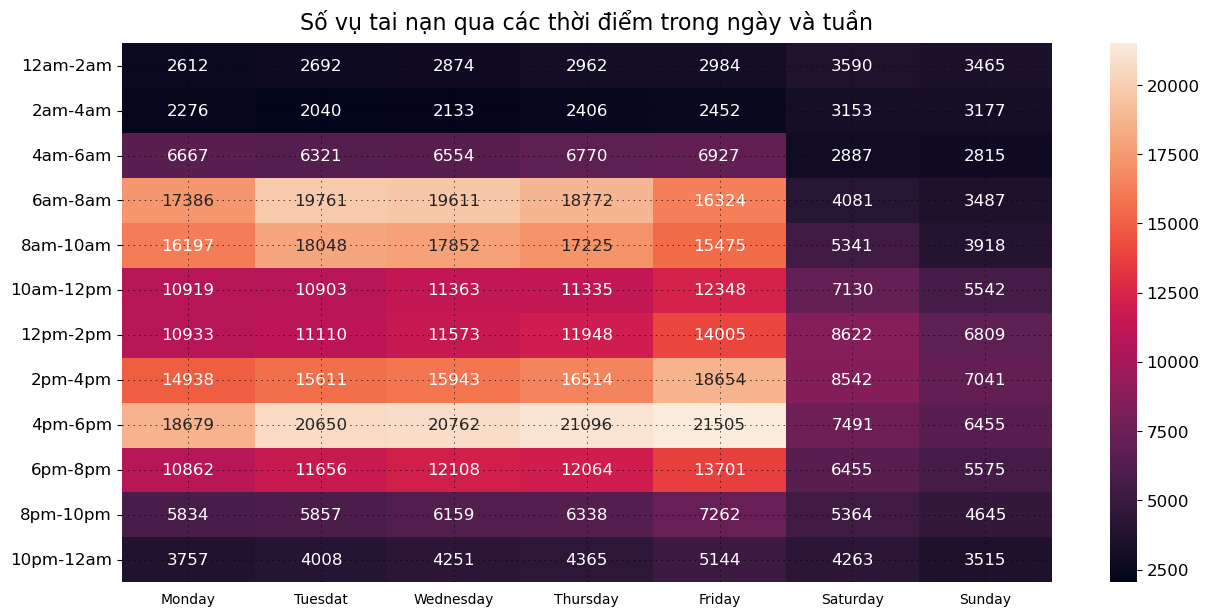

In [83]:
#Gán nhãn cho cột và hàng
y_label=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm",
         "12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"]

x_label=["Monday","Tuesdat","Wednesday","Thursday","Friday","Saturday","Sunday"]

accident_per_2hours_df=pd.DataFrame(accident_per_2hours_df,columns=x_label,index=y_label)
plt.figure(figsize=(15,7))
sns.heatmap(accident_per_2hours_df,annot=True,fmt='d')
plt.title('Số vụ tai nạn qua các thời điểm trong ngày và tuần')
plt.show()

- **Kết luận rút ra được:**
    - So với các ngày trong tuần, thì `Thứ 7` và `Chủ nhật` là các ngày xảy ra ít tai nạn hơn so với các ngày còn lại .Có thể vì là ngày cuối tuần đa số người dân sẽ ở nhà nghỉ ngơi, nên số người ra đường ít hơn so với các ngày trong tuần.
    - Thời điểm `6am-10am` và `4pm-6pm` là các thời điểm xảy ra nhiều vụ tai nạn nhất trong ngày, nhất là các ngày trong tuần. Dễ hiểu vì đây là các giờ cao điểm, lưu lượng phương tiện lưu thông trên đường phố rất cao, dẫn đến các vụ tai nạn có thể xảy ra nhiều hơn.

### 3.2.3 Số vụ tai nạn biến động qua các năm như thế nào ?
- **Lợi ích:**
    - Giúp cho người dân và các cơ quan chính phủ nắm bắt tình hình, thực trạng tai nạn ở Mỹ như thế nào thông qua các biểu đồ thể hiện số lượng vụ tai nạn qua các năm và số liệu đó có tính chu kì hay không .Điều này giúp cho các cơ quan có phương án hợp lí, kịp thời để xử lí các vấn đề trên.
- **Lựa chọn biểu đồ:**
    - Ta sẽ thực hiện decompose trên dữ liệu số lượng vụ tai nạn theo thời gian để phân tích tính xu hướng và chu kì, biểu đồ phù hợp nhất sẽ là biểu đồ đường.

In [84]:
#Chuẩn bị dữ liệu cho biểu đồ
df_time=df['Start_Time'].dt.date
df_time=pd.DataFrame(df_time.value_counts().sort_index())
df_time.columns=['Number of accidents']

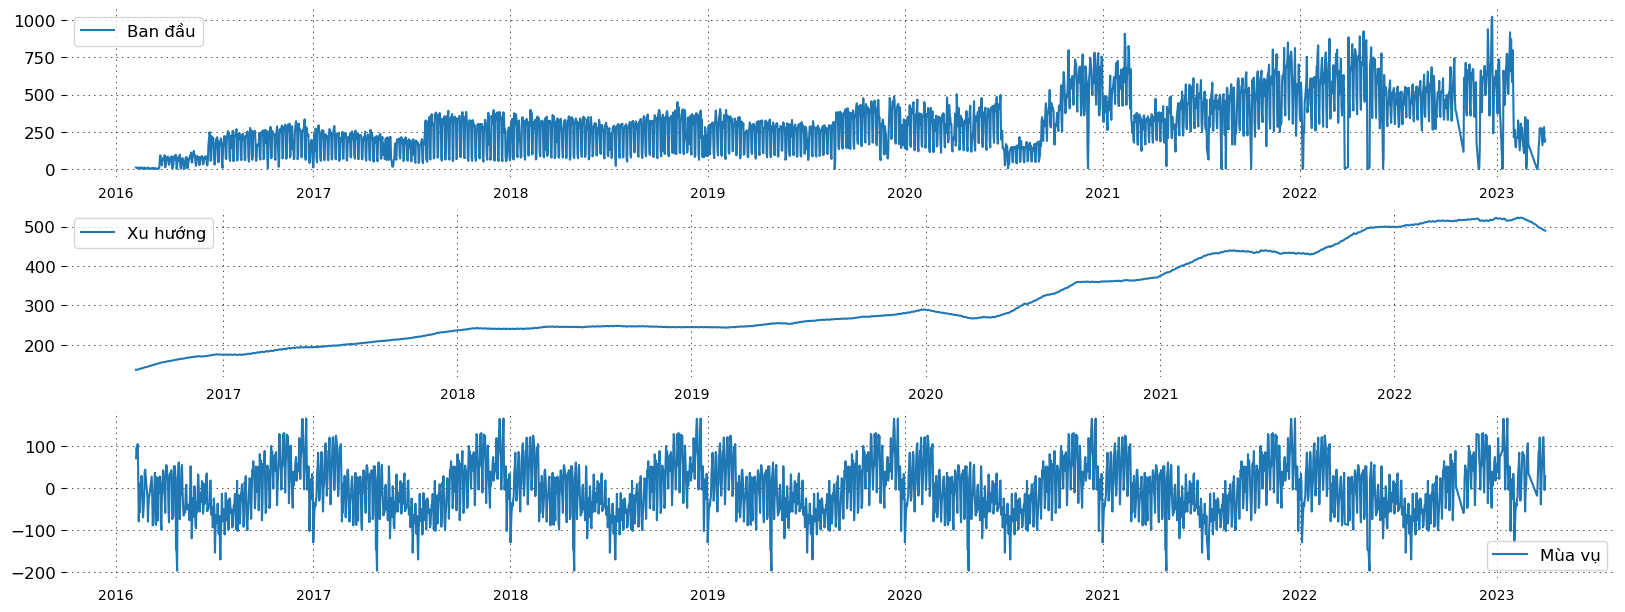

In [85]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tách thành phần
result = seasonal_decompose(df_time['Number of accidents'], model='additive', period=365) # period: chu kỳ theo năm

# Vẽ biểu đồ
plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(df_time.index, df_time['Number of accidents'], label='Ban đầu')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Xu hướng')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Mùa vụ')
plt.legend()

plt.show()


- **Kết luận rút ra được:**
    - Đối với biểu đồ xu hướng, ta thấy số lượng các vụ tai nạn đang có xu hướng tăng theo thời gian, có thể do càng ngày dân cư càng đông, tỷ lệ sở hữu phương tiện cá nhân càng nhiều,.. dẫn đến tần suất các phương tiện lưu thông trên đường càng cao, số vụ tai nạn càng tăng.
    - Đôi với biểu đồ thể hiện tính mùa vụ, ta thấy số lượng vụ tai nạn cũng có yếu tố mùa vụ .Số liệu tăng cao vào giai đoạn cuối năm, đầu năm và giảm vào các giai đoạn ở giữa năm .Điều này có thể là do vào mùa đông (cuối năm, đầu năm) thì điều kiện thời tiết không tốt để lưu thông trên đường như:sương mù, tuyết làm mặt đường trơn trượt,...

### 3.2.4 Diễn biến mức độ tai nạn ở các bang như thế nào ?
- **Lợi ích:**
    - Giúp cho người dân nước Mỹ và các cơ quan chính phủ nắm bắt tình hình, thực trạng tai nạn ở Mỹ như thế nào qua các bang, cấp độ để những cơ quan của từng bang có những quy định, luật riêng phù hợp.
- **Lựa chọn biểu đồ:**
    - Có thể thể hiện điều này bằng biều đồ cột chồng, nhưng để thể hiện tốt hơn yếu tố địa lý thì biểu đồ choropleth sẽ phù hợp và thể hiện tốt hơn.

In [86]:
#Import các thư viện cần thiết 
import folium 
from selenium import webdriver
import os   
import time

In [87]:
#Chuẩn bị data cho biểu đồ 

#Dùng value_counts() để tính số vụ tai nạn theo bang (state) và mức độ  (severity)
state_num_acc_df=df[['Severity','State']].value_counts().to_frame().reset_index()
state_num_acc_df=state_num_acc_df.rename(columns={0:"Num"})
state_num_acc_df.head()

,Severity,State,Num
0,2,CA,143801
1,2,FL,75014
2,2,TX,45008
3,2,SC,33441
4,2,NC,29573


In [88]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Timezone',
       'Weather_Timestamp', 'Temperature(C)', 'Wind_Chill(C)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [89]:
#Hàm tính các giá trị lat,lon trung tâm của mỗi state
def Create_Center_LatLong_State():
    state_df=df[['State','Start_Lat','Start_Lng']]
    state_df=state_df.groupby('State').mean()
    return state_df
def Create_Map_Followed_By_Severity(severity,html_name):
    """Tạo map hiển thị số vụ tai nạn theo bang, theo mức độ nghiêm trọng.
    Returns:
        file html:
    """
    #Gọi để lấy dữ liệu vị trí khu vực Bắc Mỹ 
    southcentral_geo = 'https://raw.githubusercontent.com/samwilliamsprojects/southCentralRegion/main/southcentraljson.geojson' 

    # Tính toán trung tâm của nước Mỹ (latitude, longitude), để hiển thị biểu đồ ban đầu
    us_center_latitude = (49.384358 + 24.396308) / 2
    us_center_longitude = (-66.93457 + -125.00165) / 2
    
    #Tạo map với center map ban đầu được gán ở biến location, độ phóng to ban đầu (zoom_start)
    _map = folium.Map(location=[us_center_latitude, us_center_longitude], zoom_start=4.2)
    
    
    #Chọn mức độ để hiện thị 
    state_num_acc_df_plot=state_num_acc_df[state_num_acc_df['Severity']==severity]
    
    
    folium.Choropleth(
        geo_data=southcentral_geo,  # new geojson data
        name="choropleth",         #tên lớp biểu đồ 
        data=state_num_acc_df_plot,  #data dùng để vẽ 
        columns=["State", "Num"],     #các cột dùng để ánh xạ với thuộc tính state bản đồ 
        key_on="feature.properties.id",  #thuộc tính trong dữ liệu địa lý (geojson) được sử dụng để kết nối với data
        fill_color="YlGn",      #màu sắc được sử dụng để tô màu các khu vực trên biểu đồ choropleth
        fill_opacity=0.7,        #độ trong suốt của màu sắc được sử dụng để tô màu các khu vực
        line_opacity=0.1,       #độ trong suốt của các đường biên giới giữa các khu vực 
        legend_name="No.Accident ",  # Tên của chú giải trên biểu đồ choropleth
    ).add_to(_map)
     
    
    #Gọi lại để lấy dữ liệu latlong trung tâm của mỗi state
    state_df=Create_Center_LatLong_State()

    # Thêm tên của các bang vào bản đồ
    for state in list(state_df.index):
         folium.Marker(state_df.loc[state,:], icon=folium.DivIcon
                       (html=f'<div style="font-family: Arial; font-size: 12pt;">{state}</div>')).add_to(_map)
         
    #Lưu lại bản đồ dưới dạng file html 
    _map.save(html_name)  
   
def Cap_Picture(image_path,html_name):
    #Lấy đường dẫn hiện tại 
    driver_path=os.getcwd()
    
    #Tạo một web đriver 
    driver = webdriver.Chrome()
    
    #Tạo đường dẫn để tiến hành mở render file html lên
    html_file_path = "file://"+driver_path+"/"+html_name
    
    
    # Render file bản đồ (html)
    driver.get(html_file_path)

    #Chờ 2s để render xong mới cap màn hình 
    time.sleep(2)
    
    # Cap màn hình lại và lưu file 
    driver.save_screenshot(image_path)

    # Đóng wedriver
    driver.quit()

In [90]:
#Danh sách các severity trong bộ dữ liệu 
severities=[1,2,3,4]

#Tên file html dùng chung cho tất cả severity
default_html_name="accidents_map.html"

#Lấy đường dẫn hiện tại 
driver_path=os.getcwd()

#Chưa có folder Image để lưu các hình ảnh thì tạo 
if not os.path.exists(driver_path+"/Image"):
    os.mkdir(driver_path+"/Image")
    
#Duyệt qua các severity để tạo bản đồ,recap bản đồ bằng selenum,lưu lại file ảnh 
for severity in severities:
    
    #Tạo map và lưu lại vào file html dùng chung
    Create_Map_Followed_By_Severity(severity,default_html_name)

    #Tạo tên/đường dẫn hình ảnh 
    image_path=driver_path+"/Image/State_With_Severity_{}.png".format(severity)
    
    #Nếu đã có phiên bản trước đó, xoá và cập nhật
    if os.path.exists(image_path):
        os.remove(image_path)
    
    #Recap màn hình và lưu file lại 
    Cap_Picture(image_path,default_html_name)


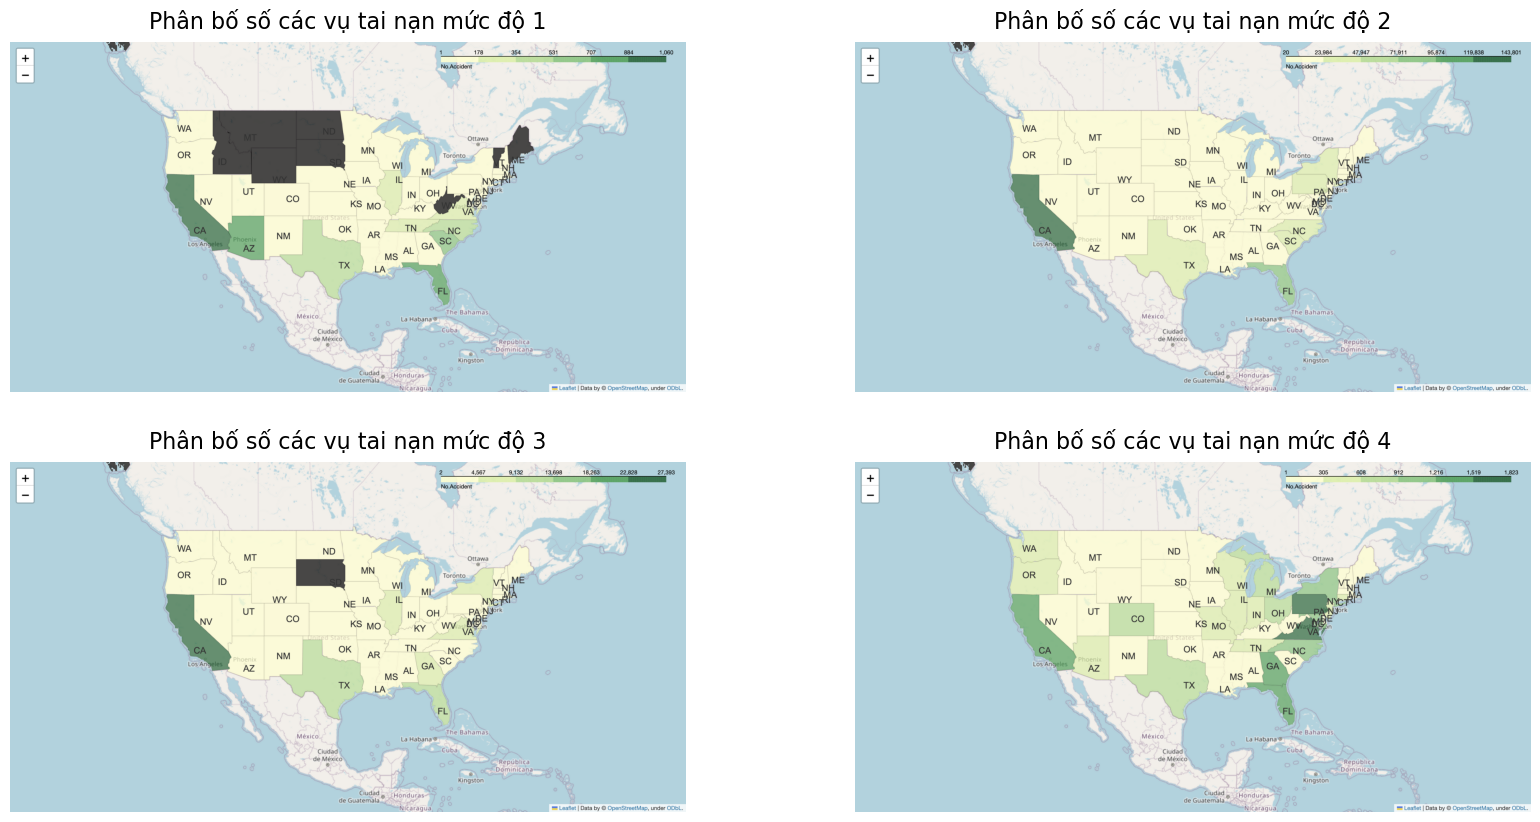

In [91]:
fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=2)
for id,severity in enumerate(severities): 
    image_path=driver_path+"/Image/State_With_Severity_{}.png".format(severity)
    # Đọc các hình ảnh .png từ đường dẫn và hiển thị chúng trên từng subplot
    image1 = plt.imread(image_path)
    
    ax[id//2][id%2].imshow(image1)
    ax[id//2][id%2].axis('off')
    ax[id//2][id%2].set_title("Phân bố số các vụ tai nạn mức độ {}".format(severity))

- Kết luận rút ra:
    - Hầu hết các bang có sự phân bố số vụ tai nạn không đồng đều ở các bang, các cấp độ.
    - Bang `California` là bang có số vụ tai nạn ở tất cả các mức độ là nhiều nhất .Điều này có thể do bang này là bang đông dân nhất nước Mỹ và là nơi trung tâm vận tải quan trọng của quốc gia này, nên tỷ lệ xảy ra các vụ nạn có lẽ sẽ cao hơn so với các bang khác.

### 3.2.5 Các điều kiện thời tiết ở ban ngày và ban đêm khi xảy ra tai nạn?
- **Lợi ích:**
    - Giúp mọi người tham gia giao thông ở những điều kiện thời tiết xấu có sự cảnh giác.
- **Lựa chọn biểu đồ**
    - Biểu đồ cánh bướm, giúp thể hiện sự tương quan giữa ban ngày và ban đêm ở từng điều kiện thời tiết.

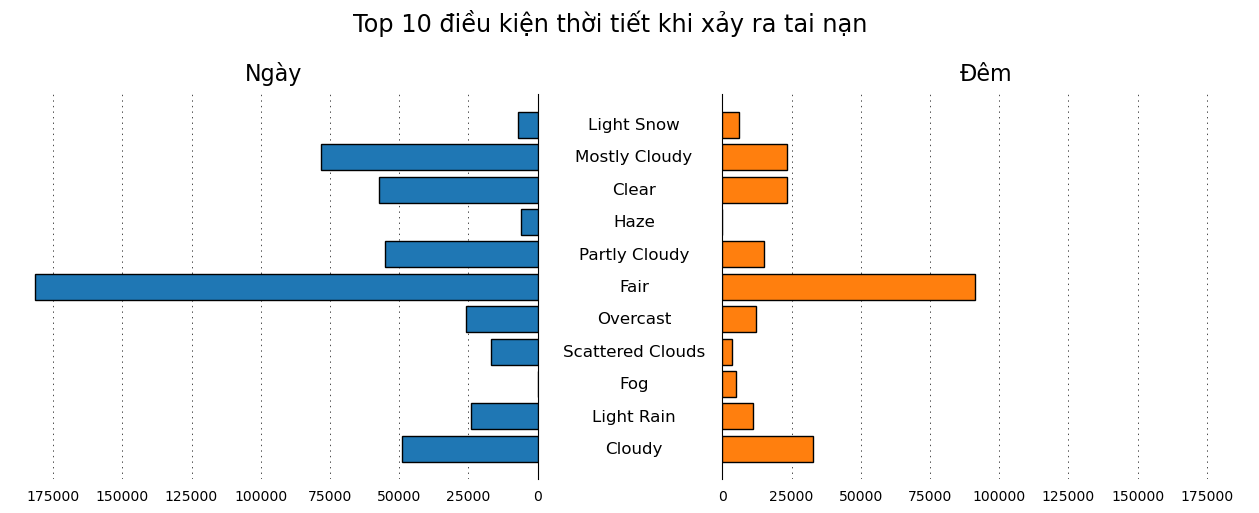

In [92]:
def butterfly_chart(data: pd.DataFrame, title: str = None, middle_label_offset=0.01, figsize=(5, 2), wspace=0.6):
    """ """
    plt.rcParams.update({
        'figure.facecolor': 'w',
        'font.size': 12,
        'axes.titlesize': 16,
        'xtick.labelsize': 10,
        'patch.force_edgecolor': True,
        'patch.facecolor': 'black',
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'xtick.bottom': False,
        'xtick.top': False,
        'axes.titlepad': 10,
        'axes.grid': True,
        'grid.color': 'k',
        'grid.linestyle': ':',
        'grid.linewidth': 0.5,
        'lines.dotted_pattern': [1, 3],
        'lines.scale_dashes': False
    })

    fig, (ax1, ax2) = plt.subplots(
        figsize=figsize,
        dpi=100,
        nrows=1,
        ncols=2,
        subplot_kw={'yticks': []},
        gridspec_kw={'wspace': wspace},
    )
    
    # Phân loại dữ liệu theo điều kiện thời tiết và thời gian (Ngày và Đêm)
    day_weather_counts = data[data["Sunrise_Sunset"] == "Day"]["Weather_Condition"].value_counts().head(10)
    night_weather_counts = data[data["Sunrise_Sunset"] == "Night"]["Weather_Condition"].value_counts().head(10)

    # Lấy danh sách 10 điều kiện thời tiết nhiều nhất
    all_conditions = list(set(day_weather_counts.index) | set(night_weather_counts.index))

    # Đảm bảo rằng tất cả các điều kiện thời tiết có sẵn trong cả ngày và đêm
    day_weather_counts = day_weather_counts.reindex(all_conditions, fill_value=0)
    night_weather_counts = night_weather_counts.reindex(all_conditions, fill_value=0)

    # plot the data
    y = range(len(all_conditions))

    ax1.barh(y=y, width=day_weather_counts, color='tab:blue', zorder=3)
    ax1.invert_xaxis()
    ax1.set_title('Ngày')

    ax2.barh(y=y, width=night_weather_counts, color='tab:orange', zorder=3)
    ax2.set_title('Đêm')
    
    # forced shared xlim
    x_max = max(ax1.get_xlim()[0], ax2.get_xlim()[0])
    ax1.set_xlim((x_max, 0))
    ax2.set_xlim((0, x_max))
    

    # turn on axes spines on the inside y-axis
    ax1.spines['right'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    

    # place center labels
    transform = transforms.blended_transform_factory(fig.transFigure, ax1.transData)
    for i, label in enumerate(all_conditions):
        ax1.text(0.5+middle_label_offset, i, label, ha='center', va='center', transform=transform)

    plt.suptitle(title, y=1.05, fontsize='x-large')

# Sử dụng hàm butterfly_chart với dữ liệu của bạn
# data là DataFrame chứa cột "Weather_Condition" và "Sunrise_Sunset"
butterfly_chart(
    df,
    figsize=(16, 5),
    wspace=0.35,
    middle_label_offset=0.015,
    title='Top 10 điều kiện thời tiết khi xảy ra tai nạn'
)
plt.show()

- **Nhận xét**
    - Ta có thể thấy hầu hết các điều kiện thời tiết đều xuất hiện ở hai phía, số vụ tai nạn ở ban ngày nhiều hơn ban đêm, có thể do ở ban ngày lưu lượng giao thông nhiều hơn. 
    - Haze và Fog là hai hiện tượng Sương Mù ở riêng biệt ở ban ngày và ban đêm, nên sự xuất hiện ở trên biểu đồ là hợp lí.

### 3.2.6 Ảnh hưởng của tốc độ gió và tầm nhìn đến tai nạn?
- **Lợi ích:**
    - Hiểu rõ hơn về mối quan hệ giữa tốc độ gió và tầm nhìn với tình trạng tai nạn giao thông, từ đó có những biện pháp an toàn.
- **Lựa chọn biểu đồ**
    - Scatter plot để xác định tương quan giữa các biến liên tục, ở đây là tốc độ gió / tầm nhìn với số lượng tai nạn.

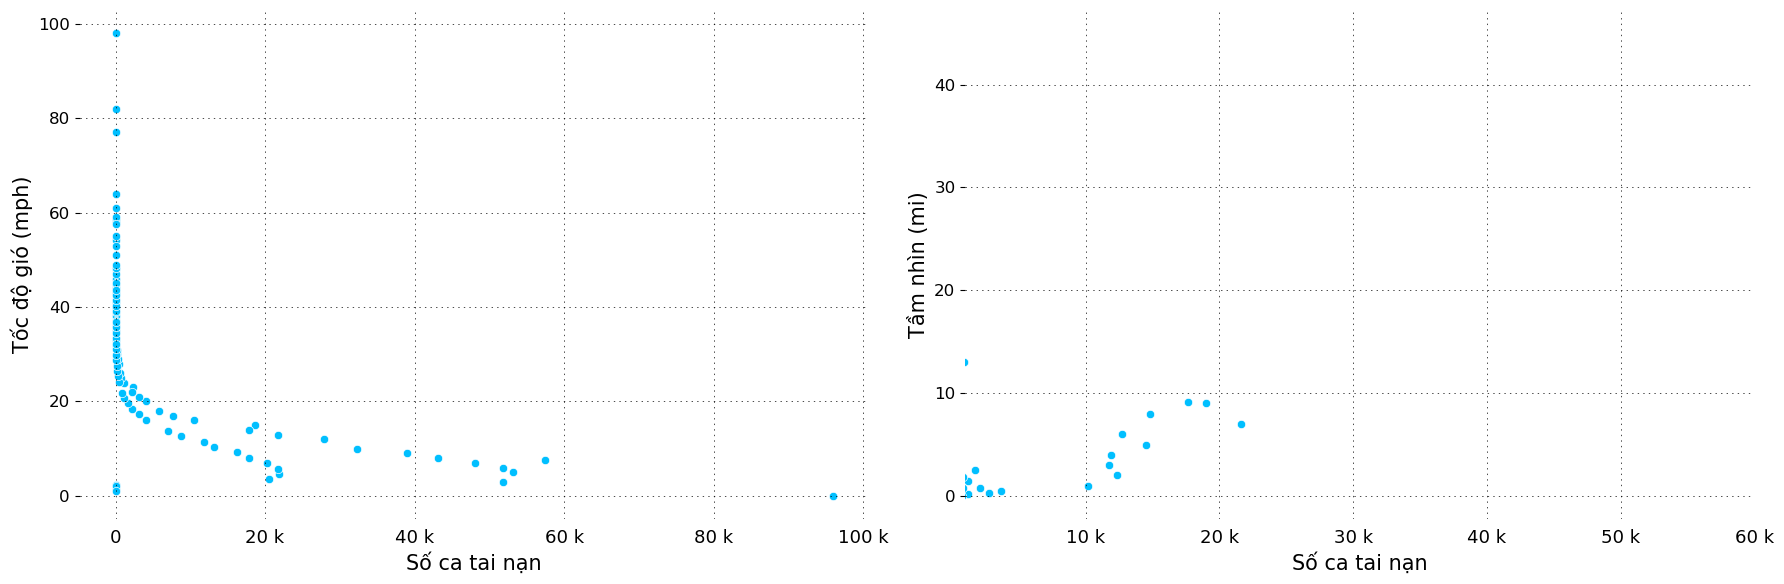

In [93]:
# Tạo DataFrame cho dữ liệu về tốc độ gió
wind = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index()
wind.columns = ["Wind_Speed", "Cases"]

# Tạo DataFrame cho dữ liệu về tầm nhìn
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index()
visibility.columns = ["Visibility", "Cases"]

# Tạo subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ cho dữ liệu về tốc độ gió
sns.scatterplot(x=wind.Cases, y=wind.Wind_Speed[wind.Wind_Speed < 100], ax=axs[0], color='deepskyblue')
axs[0].set_ylabel('Tốc độ gió (mph)', fontsize=15)
axs[0].set_xlabel('Số ca tai nạn', fontsize=15)
axs[0].tick_params(axis='x', labelsize=13)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].xaxis.set_major_formatter(ticker.EngFormatter())

# Vẽ biểu đồ cho dữ liệu về tầm nhìn
sns.scatterplot(x=visibility.Cases, y=visibility.Visibility[visibility.Visibility < 50], ax=axs[1], color='deepskyblue')
axs[1].set_ylabel('Tầm nhìn (mi)', fontsize=15)
axs[1].set_xlabel('Số ca tai nạn', fontsize=15)
axs[1].tick_params(axis='x', labelsize=13)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xlim(1000, 60000)
axs[1].xaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()

plt.show()


- **Nhận xét**
    - Trong đa số các ca tai nạn xảy ra, tốc độ gió nằm trong khoảng 5 - 10 (mph), không phải là tốc độ đáng kể (lớn).
    
    - Tương tự, trong đa số các ca tai nạn xảy ra, phạm vi tầm nhìn nằm trong khoảng từ 5 - 10 (mi), là một khoảng an toàn.
    
    => Do đó, tốc độ gió và tầm nhìn không phải là những nguyên nhân chính gây ra tai nạn.